In [ ]:
pip install dlib

In [ ]:
pip install imutils

In [ ]:
import cv2
import PIL
from PIL import Image
from imutils import face_utils
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import files
# uploaded=files.upload()

In [ ]:
  # !git clone https://github.com/MayankG514/FACE_MASK

In [ ]:
import os

In [ ]:
# from zipfile import ZipFile
# file_name='data.zip'

# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

# # from zipfile import ZipFile


In [ ]:
data_path='/content/data'

In [ ]:
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]


print(labels)
print(categories)

[0, 1]
['with_mask', 'without_mask']


In [ ]:
label_dict=dict(zip(categories,labels))

In [ ]:
label_dict

{'with_mask': 0, 'without_mask': 1}

In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
  folder_path=os.path.join(data_path,category)
  img_names=os.listdir(folder_path)

  for img_name in img_names:
    img_path=os.path.join(folder_path,img_name)
    img=cv2.imread(img_path)

    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(img_size,img_size))
    data.append(resized)
    target.append(label_dict[category])
    

In [ ]:
import numpy as np
data=np.array(data)/255
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)


Using TensorFlow backend.


In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
data=np.load('data.npy')
target=np.load('target.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPool2D
from keras.callbacks import ModelCheckpoint


In [ ]:
model =Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3),))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
# pip install ann_visualizer

In [ ]:
# pip install graphviz

In [ ]:
# from ann_visualizer.visualize import ann_viz;
# #Build your model here
# x=ann_viz(model, view=True, filename="network.gv", title="Mask Detection")

In [ ]:
# from graphviz import Source

In [ ]:
# graph_source=Source.from_file('network.gv')

In [ ]:
# graph_source

In [ ]:
# ann_viz

<function ann_visualizer.visualize.ann_viz>

In [ ]:
# model

In [ ]:
# from sklearn.model_selection import train_test_split


In [ ]:
# train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=True)

In [ ]:
# checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
# history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 880 samples, validate on 220 samples
Epoch 1/20
880/880 [==============================] - 7s 8ms/step - loss: 0.7300 - accuracy: 0.5432 - val_loss: 0.6918 - val_accuracy: 0.5227
Epoch 2/20
880/880 [==============================] - 1s 765us/step - loss: 0.6538 - accuracy: 0.6455 - val_loss: 0.6858 - val_accuracy: 0.5500
Epoch 3/20
880/880 [==============================] - 1s 758us/step - loss: 0.5172 - accuracy: 0.7420 - val_loss: 0.4137 - val_accuracy: 0.8364
Epoch 4/20
880/880 [==============================] - 1s 771us/step - loss: 0.3584 - accuracy: 0.8534 - val_loss: 0.3533 - val_accuracy: 0.8364
Epoch 5/20
880/880 [==============================] - 1s 775us/step - loss: 0.3008 - accuracy: 0.8750 - val_loss: 0.3531 - val_accuracy: 0.8455
Epoch 6/20
880/880 [==============================] - 1s 761us/step - loss: 0.2109 - accuracy: 0.9182 - val_loss: 0.2518 - val_accuracy: 0.9091
Epoch 7/20
880/880 [==============================] - 1s 755us/step - loss: 0.2074 - accurac

In [ ]:
# print(model.evaluate(test_data,test_target))

276/276 [==============================] - 0s 497us/step
[0.20490961251915366, 0.9202898740768433]


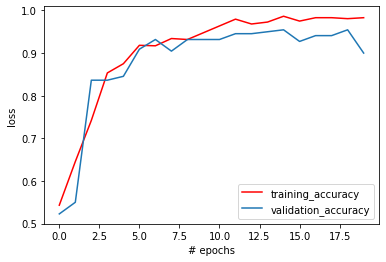

In [ ]:
# plt.plot(history.history['accuracy'],'r',label='training_accuracy')
# plt.plot(history.history['val_accuracy'],label='validation_accuracy')
# plt.xlabel('# epochs')
# plt.ylabel('loss')
# plt.legend()
# plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/model-014.model')

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 118kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=1dc47fe8033c54b0680dbbb0a7e9518ebf2abc9fdb3472c73bd6e039364d0100
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition

In [ ]:
face=face_recognition.load_image_file('/content/download.jpg')

In [ ]:
gray_img=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)

In [ ]:
img_size=100
resized_gray=cv2.resize(gray_img,(img_size,img_size))

In [ ]:
normalized=resized_gray/255.0

In [ ]:
import numpy as np

In [ ]:
reshaped=np.reshape(normalized,(1,100,100,1))

In [ ]:
result_raw=model.predict(reshaped)
label=np.argmax(result_raw,axis=1)[0]
label

0

In [ ]:
raw_img=cv2.imread('/content/download.jpg')

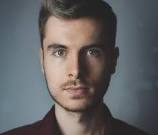

In [ ]:
cv2_imshow(raw_img)

In [ ]:
face_image_np = face_recognition.load_image_file('/content/download.jpg')
face_locations = face_recognition.face_locations(face_image_np, model='hog')
face_landmarks = face_recognition.face_landmarks(face_image_np, face_locations)

In [ ]:
land_dict=face_landmarks[0]

In [ ]:
import numpy as np

In [ ]:
def get_distance_from_point_to_line(point, line_point1, line_point2):
  distance = np.abs((line_point2[1] - line_point1[1]) * point[0] +
                    (line_point1[0] - line_point2[0]) * point[1] +
                    (line_point2[0] - line_point1[0]) * line_point1[1] +
                    (line_point1[1] - line_point2[1]) * line_point1[0]) / \
                    np.sqrt((line_point2[1] - line_point1[1]) * (line_point2[1] - line_point1[1])
                    +(line_point1[0] - line_point2[0]) * (line_point1[0] - line_point2[0]))
  return int(distance)

In [ ]:
nose_bridges = land_dict['nose_bridge']
nose_point = nose_bridges[len(nose_bridges) * 1 // 4]
nose_v = np.array(nose_point)

In [ ]:
chin = land_dict['chin']
chin_len = len(chin)
chin_bottom_point = chin[chin_len // 2]
chin_bottom_v = np.array(chin_bottom_point)
chin_left_point = chin[chin_len // 8]
chin_right_point = chin[chin_len * 7 // 8]

In [ ]:
mask_img = Image.open('blue-mask.png')

In [ ]:
width =mask_img.width
height =mask_img.height
width_ratio = 1.2
new_height = int(np.linalg.norm(nose_v - chin_bottom_v))

In [ ]:
sample_mask=cv2.imread('/content/blue-mask.png')

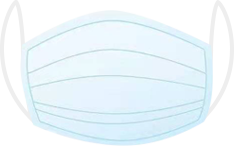

In [ ]:
mask_img

In [ ]:
mask_left_img = mask_img.crop((0, 0, width // 2, height))
mask_left_width =get_distance_from_point_to_line(chin_left_point, nose_point, chin_bottom_point)
mask_left_width =int(mask_left_width * width_ratio)
mask_left_img =mask_left_img.resize((mask_left_width, new_height))

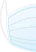

In [ ]:
mask_left_img

In [ ]:
mask_right_img =mask_img.crop((width // 2, 0, width, height))
mask_right_width =get_distance_from_point_to_line(chin_right_point, nose_point, chin_bottom_point)
mask_right_width =int(mask_right_width * width_ratio)
mask_right_img =mask_right_img.resize((mask_right_width, new_height))

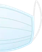

In [ ]:
mask_right_img

In [ ]:
size = (mask_left_img.width + mask_right_img.width, new_height)
mask_img = Image.new('RGBA', size)
mask_img.paste(mask_left_img, (0, 0), mask_left_img)
mask_img.paste(mask_right_img, (mask_left_img.width, 0), mask_right_img)

In [ ]:
angle = np.arctan2(chin_bottom_point[1] - nose_point[1], chin_bottom_point[0] - nose_point[0])
rotated_mask_img = mask_img.rotate(angle, expand=True)

In [ ]:
center_x = (nose_point[0] + chin_bottom_point[0]) // 2
center_y = (nose_point[1] + chin_bottom_point[1]) // 2
offset = mask_img.width // 2 - mask_left_img.width
radian = angle * np.pi / 180
box_x = center_x + int(offset * np.cos(radian)) - rotated_mask_img.width // 2
box_y = center_y + int(offset * np.sin(radian)) - rotated_mask_img.height // 2

In [ ]:
face_img =Image.fromarray(face_image_np)

In [ ]:
face_img.paste(mask_img, (box_x, box_y), mask_img)

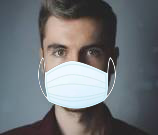

In [ ]:
face_img

In [ ]:
face_img.save('Generated_image.png')

In [ ]:
face=face_recognition.load_image_file('/content/Generated_image.png')
gray_test_img=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY) 
img_size=100
resized_gray=cv2.resize(gray_test_img,(img_size,img_size))
normalized=resized_gray/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result_gen=model.predict(reshaped)

In [ ]:
label_gen=np.argmax(result_gen,axis=1)[0]
label_gen

1